In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


pd.options.display.max_columns = None
df = pd.read_csv('verbose_course_ratings.csv')
df.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score,course_id
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1043.000000
mean,25.233907,31.179095,4.336048,4.527406,4.558955,0.692437,4.057170,4.218611,4.221160,0.326070,6.259930,5.764818,6.349904,2.865679,4.290274,4.469089,4.492670,0.742670,0.608711,0.698609,0.553975,0.247971,0.003912,0.000637,0.001275,-0.057716,0.894035,-0.210416,0.052777,144008.498562
std,48.277176,57.014447,0.534587,0.631508,0.752884,0.350297,1.529649,1.598791,1.634345,0.606183,3.147497,3.145009,4.177877,1.714289,0.548926,0.652825,0.791442,0.367077,0.242642,0.261472,0.424845,0.401372,0.029237,0.017846,0.035692,0.278818,0.209251,0.316241,0.209653,39741.764790
min,5.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,1.670000,1.000000,1.000000,-1.000000,-0.199550,-0.267100,-0.922700,-1.000000,-0.083333,0.000000,0.000000,-1.000000,0.000000,-0.997600,0.000000,177.000000
25%,8.000000,10.000000,4.000000,4.000000,4.000000,0.464799,4.150000,4.000000,5.000000,0.000000,4.000000,4.000000,4.000000,1.600000,4.000000,4.000000,4.000000,0.500000,0.464667,0.578250,0.067100,0.163027,0.000000,0.000000,0.000000,0.000000,0.911700,-0.410400,0.000000,116243.000000
50%,12.000000,15.000000,4.500000,5.000000,5.000000,0.723462,4.670000,5.000000,5.000000,0.402015,5.500000,5.000000,5.000000,2.510000,4.400000,5.000000,5.000000,0.760000,0.657037,0.790450,0.713100,0.327158,0.000000,0.000000,0.000000,0.000000,0.971200,0.000000,0.000000,123964.000000
75%,22.000000,28.000000,4.740000,5.000000,5.000000,0.938536,4.910000,5.000000,5.000000,0.729704,7.860000,7.000000,8.000000,3.710000,4.710000,5.000000,5.000000,0.980000,0.782950,0.893100,0.926000,0.472767,0.000000,0.000000,0.000000,0.000000,0.988400,0.000000,0.000000,160494.000000
max,511.000000,596.000000,5.000000,5.000000,5.000000,1.687578,5.000000,5.000000,5.000000,2.010076,20.800000,20.000000,30.000000,13.650000,5.000000,5.000000,5.000000,2.190000,0.990800,0.990800,0.999300,0.914310,0.500000,0.500000,1.000000,0.707107,0.999700,0.000000,0.997800,222836.000000


In [3]:
df.dtypes

course_code                object
course_title               object
course_teacher             object
link                       object
fas_code                   object
unique_code                object
num_responded             float64
num_students              float64
course_score_mean         float64
course_score_median       float64
course_score_mode         float64
course_score_stdev        float64
lecturer_score_mean       float64
lecturer_score_median     float64
lecturer_score_mode       float64
lecturer_score_stdev      float64
workload_score_mean       float64
workload_score_median     float64
workload_score_mode       float64
workload_score_stdev      float64
rec_score_mean            float64
rec_score_median          float64
rec_score_mode            float64
rec_score_stdev           float64
sentiment_score_mean      float64
sentiment_score_median    float64
sentiment_score_mode      float64
sentiment_score_stdev     float64
gem_score_mean            float64
gem_score_medi

In [4]:
df['course_id']

0            NaN
1            NaN
2       123590.0
3            NaN
4       108879.0
          ...   
1565    159887.0
1566         NaN
1567         NaN
1568         NaN
1569    216815.0
Name: course_id, Length: 1570, dtype: float64

In [5]:
df['course_id'].fillna(-1,inplace=True)
df['course_id'] = df['course_id'].astype(int).astype(str)

In [6]:
df['course_identifier'] = df['course_code'] + ' ' + df['course_title']
df = df.drop_duplicates(subset='course_identifier', keep="first")

In [7]:
df.nlargest(5,'sentiment_score_mean')

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier
1338,FRENCH 10,Beginning French I: Cross-Cultural Encounters ...,Mills,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126933-2232-1-1-001,FAS-126933-2232-1-1-001(Mills),9.0,13.0,4.57,5.0,5.0,0.729704,0.0,0.0,0.0,-1.000000,5.57,2.0,2.0,5.53,4.71,5.0,5.0,0.49,0.99080,0.99080,0.9908,-1.000000,0.0,0.0,0.0,-1.0,This course is a great intro to french. you le...,0.9908,NaN,0.0,NaN,0.0,126933,Primarily for Undergraduate Students,Romance Languages & Lit,French,NaN,None,NaN,Lecture,Beginning French I: Cross-Cultural Encounters ...,FRENCH 10 Beginning French I: Cross-Cultural E...
273,VIETNAM 120B,Intermediate Vietnamese 001,Le,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116270-2232-1-1-001,FAS-116270-2232-1-1-001(Le),6.0,7.0,5.00,5.0,5.0,0.000000,5.0,5.0,5.0,0.000000,3.50,3.5,6.0,2.08,4.80,5.0,5.0,0.45,0.98105,0.98105,0.9782,0.004031,0.0,0.0,0.0,0.0,"This class is very fun, but this is very depen...",0.9839,NaN,0.0,NaN,0.0,116270,For Undergraduate and Graduate Students,East Asian Langs & Civ,Vietnamese,NaN,None,NaN,Lecture,Intermediate Vietnamese,VIETNAM 120B Intermediate Vietnamese 001
1548,TDM 131,Directing Lab 001,Milikowsky,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126812-2232-1-1-001,FAS-126812-2232-1-1-001(Milikowsky),5.0,6.0,4.25,5.0,5.0,1.305582,4.5,5.0,5.0,0.870388,6.25,5.0,5.0,3.95,4.25,5.0,5.0,1.50,0.97990,0.97990,0.9799,-1.000000,0.0,0.0,0.0,-1.0,Take this class!!! I had never directed before...,0.9799,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TDM 131 Directing Lab 001
155,LATIN 103,Latin Elegy 001,Philbrick,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116088-2232-1-1-001,FAS-116088-2232-1-1-001(Philbrick),5.0,7.0,4.80,5.0,5.0,0.402015,5.0,5.0,5.0,0.000000,5.40,5.0,5.0,1.52,4.80,5.0,5.0,0.45,0.97685,0.97685,0.9831,0.008839,0.0,0.0,0.0,0.0,Highly recommend this course! No knowledge of ...,0.9831,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LATIN 103 Latin Elegy 001
1326,PSY 2461R,Laboratory for Clinical and Developmental Rese...,Nock,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-119124-2232-1-1-001,FAS-119124-2232-1-1-001(Nock),8.0,12.0,4.71,5.0,5.0,0.697470,5.0,5.0,5.0,0.000000,6.43,6.0,6.0,4.04,4.71,5.0,5.0,0.49,0.97430,0.97430,0.9743,-1.000000,0.0,0.0,0.0,-1.0,Great opportunity to learn more about the rese...,0.9743,NaN,0.0,NaN,0.0,119124,Primarily for Graduate Students,Psychology,Psychology,NaN,Social Sciences,NaN,Laboratory Research,Laboratory for Clinical and Developmental Rese...,PSY 2461R Laboratory for Clinical and Developm...


In [8]:
dftest = df.sample(20)
dftest.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,max_sent_score,min_sent_score,max_gem_score
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.000000,20.000000,20.000000,20.000000
mean,14.300000,18.000000,4.532500,4.800000,4.900000,0.594225,3.741000,3.900000,3.850000,0.175836,5.047500,4.650000,4.750000,1.915500,4.499000,4.675000,4.700000,0.573000,0.778037,0.869295,0.801860,0.188113,0.000877,0.0,0.0,-0.043377,0.957140,-0.085635,0.049625
std,21.440493,23.534968,0.386276,0.523148,0.307794,0.252682,1.937038,2.023546,2.033276,0.664742,2.166714,2.103256,1.996708,0.968371,0.431544,0.568354,0.571241,0.225671,0.121615,0.098991,0.235053,0.322019,0.003923,0.0,0.0,0.227100,0.044412,0.210593,0.221930
min,5.000000,6.000000,3.150000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.330000,1.000000,1.000000,0.580000,3.000000,3.000000,3.000000,0.000000,0.551833,0.611500,0.000000,-1.000000,0.000000,0.0,0.0,-1.000000,0.831600,-0.627800,0.000000
25%,6.000000,7.750000,4.500000,5.000000,5.000000,0.456048,4.187500,4.000000,3.750000,0.000000,3.652500,3.000000,3.750000,1.197500,4.400000,4.375000,4.750000,0.447500,0.691713,0.846912,0.675225,0.112260,0.000000,0.0,0.0,0.000000,0.942900,0.000000,0.000000
50%,9.500000,13.500000,4.600000,5.000000,5.000000,0.564758,4.635000,5.000000,5.000000,0.402015,4.835000,4.750000,5.000000,1.825000,4.530000,5.000000,5.000000,0.550000,0.815015,0.907250,0.902050,0.200307,0.000000,0.0,0.0,0.000000,0.978600,0.000000,0.000000
75%,13.250000,17.000000,4.710000,5.000000,5.000000,0.756507,4.840000,5.000000,5.000000,0.598310,6.130000,5.250000,5.250000,2.452500,4.785000,5.000000,5.000000,0.710000,0.867263,0.935288,0.949750,0.373434,0.000000,0.0,0.0,0.000000,0.987700,0.000000,0.000000
max,104.000000,115.000000,5.000000,5.000000,5.000000,1.113508,5.000000,5.000000,5.000000,1.005038,11.380000,11.000000,10.000000,4.530000,5.000000,5.000000,5.000000,1.000000,0.967950,0.973800,0.990500,0.580503,0.017544,0.0,0.0,0.132453,0.993800,0.000000,0.992500


In [9]:
import re
from nltk import tokenize
import nltk
nltk.download('punkt')

df['best_gem_comment'].fillna('',inplace=True)

def get_short_gem_comment(comment):
  if comment == '':
    return ''
  for sentence in tokenize.sent_tokenize(comment):
    if re.search(r'\bgem\b',sentence.lower()):
      return sentence
  assert False


df['best_gem_comment_short'] = df['best_gem_comment'].apply(get_short_gem_comment)

[nltk_data] Downloading package punkt to /Users/jeqcho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df['course_title_2024'].fillna('',inplace=True)

def get_useful_title(row):
  if row['course_code'].startswith('EXPOS 20'):
    return row['course_title']
  # somehow my.harvard gives an error if the title starts with a single word
  # followed by a colon
  return row['course_title_2024'].replace(':','')


df['useful_title'] = df.apply (lambda row: get_useful_title(row), axis=1)

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['best_comment'].fillna('',inplace=True)

def get_short_comment(comment):
  if comment == '':
    return ''
  max_score = 0
  best_short_comment = ''
  for sentence in tokenize.sent_tokenize(comment):
    score = sia.polarity_scores(sentence)['compound']
    if score > max_score:
      max_score = score
      best_short_comment = sentence
  return best_short_comment


df['best_comment_short'] = df['best_comment'].apply(get_short_comment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeqcho/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
def get_first_sentece(comment):
  if comment == '':
    return ''
  return tokenize.sent_tokenize(comment)[0]


df['best_comment_first'] = df['best_comment'].apply(get_first_sentece)

In [13]:
!pip install xlsxwriter
df.to_excel("verbose_course_ratings.xlsx", engine='xlsxwriter')


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


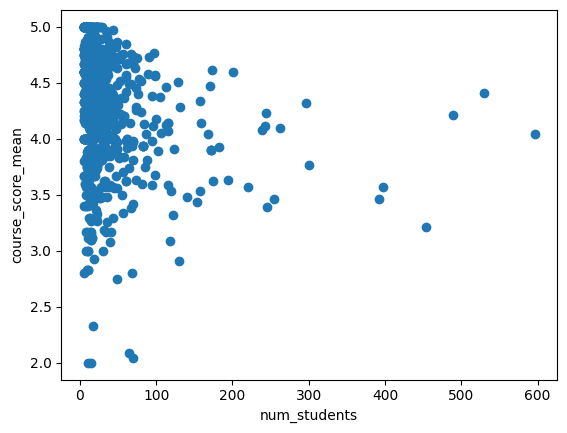

In [14]:
plt.scatter(df['num_students'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('num_students')
plt.ylabel('course_score_mean')
plt.gca().set_facecolor('white')
# Show the plot
plt.show()

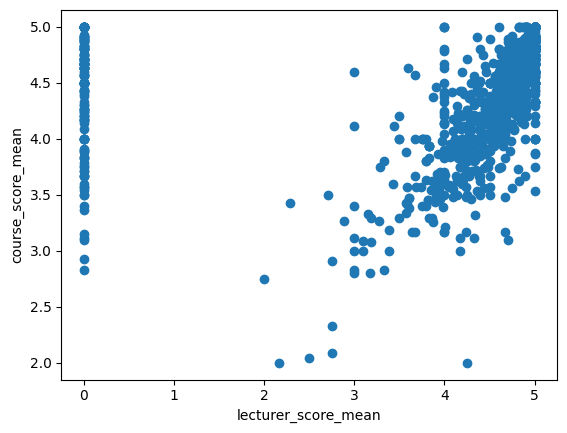

In [15]:
plt.scatter(df['lecturer_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

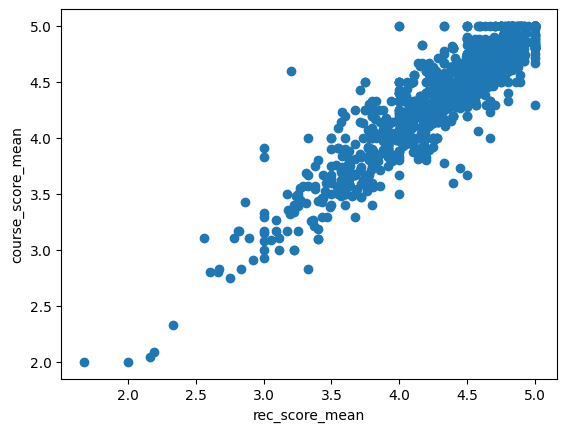

In [16]:
plt.scatter(df['rec_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('rec_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

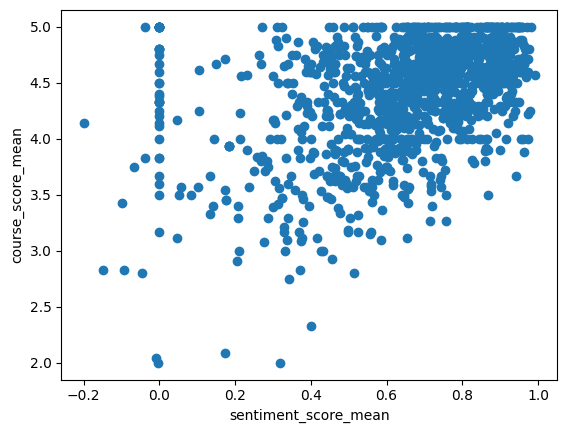

In [17]:
plt.scatter(df['sentiment_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('sentiment_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

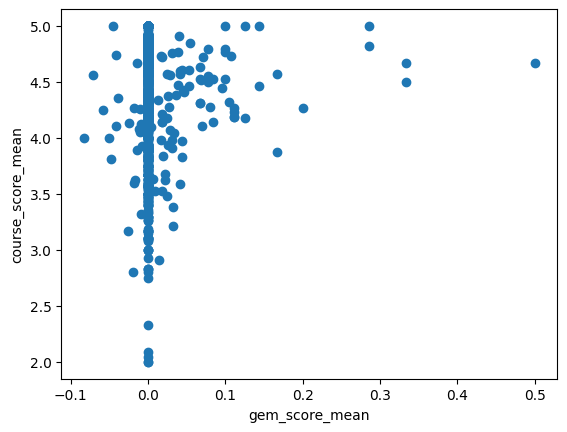

In [18]:
plt.scatter(df['gem_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

80


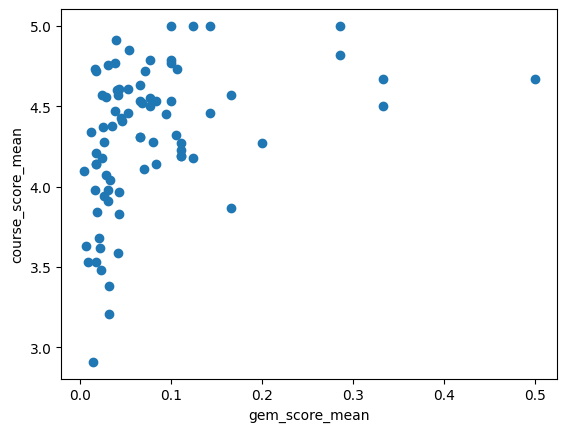

In [19]:
df_course_gem = df[df['gem_score_mean'] > 0]
df_course_gem = df_course_gem[df_course_gem['gem_score_mean'] < 1]
print(len(df_course_gem))
plt.scatter(df_course_gem['gem_score_mean'], df_course_gem['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

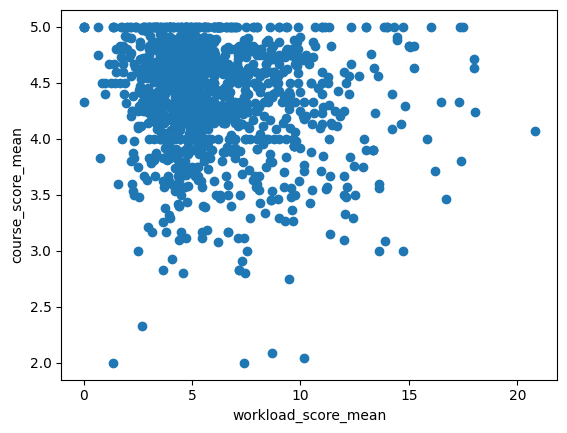

In [20]:
plt.scatter(df['workload_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

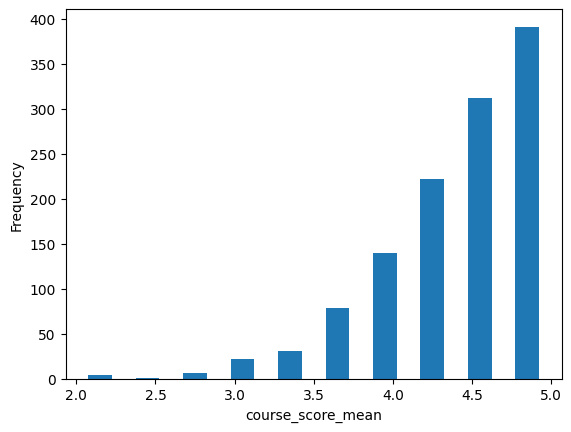

In [21]:
plt.hist(df['course_score_mean'], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

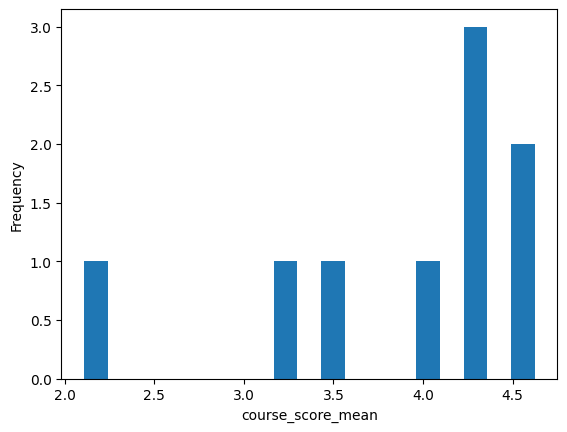

,course_code,course_title,course_score_mean,workload_score_mean
48,APMTH 101,Statistical Inference for Scientists and Engin...,4.69,4.93
53,APMTH 120,Applied Linear Algebra and Big Data 001,4.46,8.01
55,APMTH 220,Geometric Methods for Machine Learning 001,4.37,7.39
57,APMTH 231,Decision Theory 001,4.37,8.68
47,APMTH 50,Introduction to Applied Mathematics 001,4.21,6.39
51,APMTH 108,Nonlinear Dynamical Systems 001,4.12,11.47
52,APMTH 115,Mathematical Modeling 001,3.59,6.66
50,APMTH 107,Graph Theory and Combinatorics 001,3.27,9.29
49,APMTH 105,Ordinary and Partial Differential Equations 001,2.04,10.16


In [27]:
plt.hist(df['course_score_mean'][df['department']=="Applied Mathematics"], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

df[df['department']=="Applied Mathematics"][[
"course_code",
    "course_title",
    "course_score_mean",
    "workload_score_mean"
]].sort_values(by=['course_score_mean'],ascending=False)

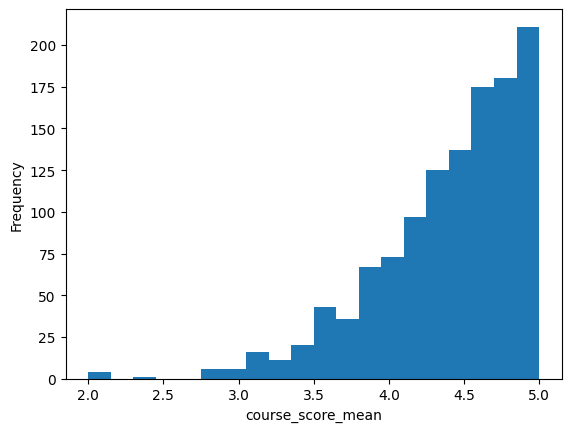

In [21]:
plt.hist(df['course_score_mean'],bins=20)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

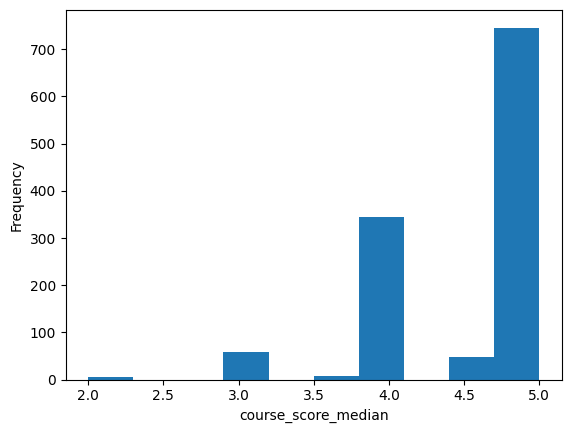

In [22]:
plt.hist(df['course_score_median'])

# Add x-axis and y-axis labels
plt.xlabel('course_score_median')
plt.ylabel('Frequency')

# Show the plot
plt.show()

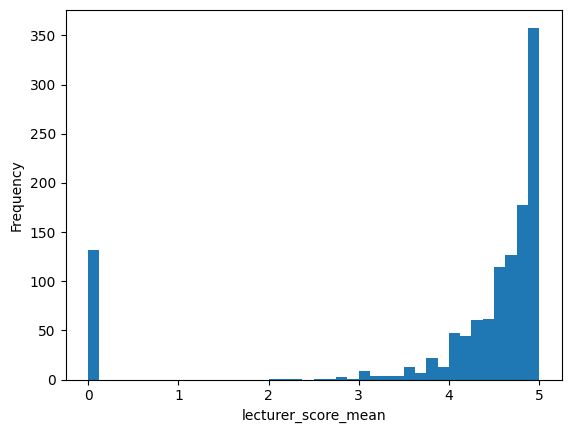

In [23]:
plt.hist(df['lecturer_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

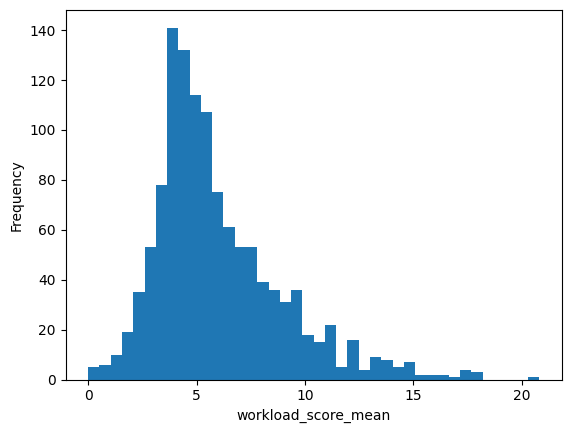

In [24]:
plt.hist(df['workload_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [25]:
df['num_students'].describe()

count    1208.000000
mean       27.011589
std        45.945014
min         5.000000
25%        10.000000
50%        14.500000
75%        25.000000
max       596.000000
Name: num_students, dtype: float64

In [26]:
import numpy

df_super_gem = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] > 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['course_level'] != 'Graduate Course')
]

print(len(df_super_gem))
df_super_gem = df_super_gem.sort_values(by=['gem_score_mean'],ascending=False)
df_super_gem

22


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
1414,SPANSH 61PH,Spanish for Public Health 001,Gutierrez,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-205383-2232-1-1-001,FAS-205383-2232-1-1-001(Gutierrez),13.0,16.0,4.67,5.0,5.0,0.472582,4.90,5.0,5.0,0.301511,5.50,6.0,8.0,3.38,4.56,5.0,5.0,0.73,0.767967,0.78860,0.7886,0.176159,0.333333,0.0,0.0,0.577350,Take this class if you want to simultaneously ...,0.9329,NaN,0.0000,"Take this class, a gem! It is not very demandi...",0.7886,205383,Primarily for Undergraduate Students,Romance Languages & Lit,Spanish,NaN,Arts and Humanities,NaN,Lecture,Spanish for Public Health,SPANSH 61PH Spanish for Public Health 001,"Take this class, a gem!",Spanish for Public Health,The readings are very difficult and will take ...,Take this class if you want to simultaneously ...
1087,MBB 980M,Functional Neuroimaging of Psychiatric Disorde...,Silbersweig,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-160759-2232-1-1-001,FAS-160759-2232-1-1-001(Silbersweig),14.0,16.0,4.82,5.0,5.0,0.386123,5.00,5.0,5.0,0.000000,3.80,3.0,2.0,2.20,4.80,5.0,5.0,0.42,0.592786,0.72420,0.7082,0.436857,0.285714,0.0,0.0,0.487950,Good class. There are writing assignments due ...,0.9391,This class is honestly such a gem. Though the ...,-0.0618,This class is a GEM! The professor is very kin...,0.7082,160759,Primarily for Undergraduate Students,"Mind, Brain & Behavior","Mind, Brain & Behavior",NaN,Science & Engineering & Applied Science,NaN,Seminar,Functional Neuroimaging of Psychiatric Disorde...,MBB 980M Functional Neuroimaging of Psychiatri...,This class is a GEM!,Functional Neuroimaging of Psychiatric Disorde...,There are writing assignments due every week b...,Good class.
537,EXPOS 20,Expository Writing 20 236,Routon,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-236,FAS-116353-2232-1-1-236(Routon),14.0,15.0,4.46,5.0,5.0,0.642281,4.69,5.0,5.0,0.464823,3.64,4.0,4.0,1.12,4.54,5.0,5.0,0.66,0.870986,0.91160,0.8443,0.099705,0.142857,0.0,0.0,0.377964,"Overall, this Expos was fantastic! I had many ...",0.9792,NaN,0.0000,This class is a gem if you are interested in t...,0.9419,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 236,This class is a gem if you are interested in t...,Expository Writing 20 236,"Dr. Routon was fantastic, very kind and unders...","Overall, this Expos was fantastic!"
1353,FRENCH 40,Advanced French I: The Contemporary Francophon...,Brisson,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126997-2232-1-1-003,FAS-126997-2232-1-1-003(Brisson),11.0,14.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.78,4.0,5.0,2.11,4.78,5.0,5.0,0.44,0.765613,0.80775,0.8687,0.222275,0.125000,0.0,0.0,0.353553,This class is phenomenal. Dr. Brisson is an am...,0.9868,NaN,0.0000,I would highly recommend that you take this cl...,0.9510,126997,Primarily for Undergraduate Students,Romance Languages & Lit,French,NaN,Arts and Humanities,NaN,Lecture,Advanced French I: The Contemporary Francophon...,FRENCH 40 Advanced French I: The Contemporary ...,"Dr. Brisson is an absolute gem, the sweetest l...",Advanced French I The Contemporary Fran

In [27]:
df_super_gem = df_super_gem[df_super_gem['course_code'] != 'EXPOS 20']
df_super_gem

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
1414,SPANSH 61PH,Spanish for Public Health 001,Gutierrez,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-205383-2232-1-1-001,FAS-205383-2232-1-1-001(Gutierrez),13.0,16.0,4.67,5.0,5.0,0.472582,4.90,5.0,5.0,0.301511,5.50,6.0,8.0,3.38,4.56,5.0,5.0,0.73,0.767967,0.78860,0.7886,0.176159,0.333333,0.0,0.0,0.577350,Take this class if you want to simultaneously ...,0.9329,NaN,0.0000,"Take this class, a gem! It is not very demandi...",0.7886,205383,Primarily for Undergraduate Students,Romance Languages & Lit,Spanish,NaN,Arts and Humanities,NaN,Lecture,Spanish for Public Health,SPANSH 61PH Spanish for Public Health 001,"Take this class, a gem!",Spanish for Public Health,The readings are very difficult and will take ...,Take this class if you want to simultaneously ...
1087,MBB 980M,Functional Neuroimaging of Psychiatric Disorde...,Silbersweig,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-160759-2232-1-1-001,FAS-160759-2232-1-1-001(Silbersweig),14.0,16.0,4.82,5.0,5.0,0.386123,5.00,5.0,5.0,0.000000,3.80,3.0,2.0,2.20,4.80,5.0,5.0,0.42,0.592786,0.72420,0.7082,0.436857,0.285714,0.0,0.0,0.487950,Good class. There are writing assignments due ...,0.9391,This class is honestly such a gem. Though the ...,-0.0618,This class is a GEM! The professor is very kin...,0.7082,160759,Primarily for Undergraduate Students,"Mind, Brain & Behavior","Mind, Brain & Behavior",NaN,Science & Engineering & Applied Science,NaN,Seminar,Functional Neuroimaging of Psychiatric Disorde...,MBB 980M Functional Neuroimaging of Psychiatri...,This class is a GEM!,Functional Neuroimaging of Psychiatric Disorde...,There are writing assignments due every week b...,Good class.
1353,FRENCH 40,Advanced French I: The Contemporary Francophon...,Brisson,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-126997-2232-1-1-003,FAS-126997-2232-1-1-003(Brisson),11.0,14.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.78,4.0,5.0,2.11,4.78,5.0,5.0,0.44,0.765613,0.80775,0.8687,0.222275,0.125000,0.0,0.0,0.353553,This class is phenomenal. Dr. Brisson is an am...,0.9868,NaN,0.0000,I would highly recommend that you take this cl...,0.9510,126997,Primarily for Undergraduate Students,Romance Languages & Lit,French,NaN,Arts and Humanities,NaN,Lecture,Advanced French I: The Contemporary Francophon...,FRENCH 40 Advanced French I: The Contemporary ...,"Dr. Brisson is an absolute gem, the sweetest l...",Advanced French I The Contemporary Francophone...,"Dr. Brisson is an amazing teacher, super nice ...",This class is phenomenal.
637,GENED 1179,Psychotherapy and the Modern Self 001,Lunbeck,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-219657-2232-1-1-001,FAS-219657-2232-1-1-001(Lunbeck),252.0,296.0,4.32,5.0,5.0,0.795395,4.57,5.0,5.0,0.656069,2.92,3.0,2.0,1.53,4.54,5.0,5.0,0.73,0.707180,0.86890,0.0000,0.345273,0.105263,0.0,0.0,0.308052,this class is actually one of the best classes...,0.9962,You should take this class no matter what your...,-0.8516,Take this course!! This was my favorite class ...,0.9916,219657,Primarily for Undergraduate Students,General Education,General Education,NaN,None,Science and Technology in Society,Lecture,Psychotherapy and the Modern Self,GENED 11

In [28]:
df_super_gem[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
]].to_json('output_data/super_gems.json',orient='records')

In [29]:
department_list = [x for x in df['department'].unique() if str(x)!='nan']
department_list.sort()
import json
with open('output_data/department_list.json', "w") as f:
    json.dump(department_list, f)
department_list

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Biomedical Engineering',
 'Biophysics',
 'Biostatistics',
 'Chemical & Physical Biology',
 'Chemical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Comparative Literature',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Envi Science & Public Policy',
 'Environmental Sci & Engineer',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'Folklore & Mythology',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematics',
 'Medical Sciences',
 'Mind, Brain & Behavior',
 'Mo

In [30]:
def get_gems_of_department(department):
  df_gem_of_department = df[
     (df['department'] == department)
  & (df['gem_score_mean'] > 0)
  & (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
  & (df['workload_score_mean'] < 7)
  & (df['course_id'] != '-1')
    & (df['course_level'] != 'Graduate Course')
  ]

  df_gem_of_department = df_gem_of_department.sort_values(by=['gem_score_mean'],ascending=False).head(5)
  df_gem_of_department[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
  ]].to_json('departments/'+department+'.json',orient='records')

In [31]:
for department in department_list:
  get_gems_of_department(department)

In [32]:
df[df['department'] == 'Expository Writing']

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
503,EXPOS 20,Expository Writing 20 201,Allen,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-201,FAS-116353-2232-1-1-201(Allen),12.0,14.0,4.50,4.5,4.0,0.502519,4.80,5.0,5.0,0.402015,5.50,5.0,4.0,2.01,4.50,4.5,4.0,0.53,0.750400,0.76240,0.7624,0.198768,0.000000,0.0,0.0,0.000000,As a required and bothersome course full of ex...,0.9915,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 201,,Expository Writing 20 201,But if you choose a course that looks interest...,As a required and bothersome course full of ex...
504,EXPOS 20,Expository Writing 20 202,Alqera,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-202,FAS-116353-2232-1-1-202(Alqera),14.0,15.0,4.23,4.0,5.0,0.802207,4.15,5.0,5.0,1.038404,3.55,4.0,4.0,0.82,4.67,5.0,5.0,0.49,0.759833,0.80080,0.8829,0.297995,0.111111,0.0,0.0,0.333333,"Of the expos classes you could take, this is o...",0.9968,NaN,0.0000,Take this class! A gem of an expos class with ...,0.7574,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 202,A gem of an expos class with a brilliant instr...,Expository Writing 20 202,There's also a meditation to start each class ...,"Of the expos classes you could take, this is o..."
505,EXPOS 20,Expository Writing 20 203,Alqera,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-203,FAS-116353-2232-1-1-203(Alqera),15.0,15.0,4.40,4.0,4.0,0.617725,4.60,5.0,5.0,0.619326,3.73,3.0,3.0,1.22,4.50,5.0,5.0,0.76,0.631155,0.88580,0.0000,0.411482,0.000000,0.0,0.0,0.000000,TAKE THIS EXPOS SECTION. This without a doubt ...,0.9805,NaN,0.0000,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 203,,Expository Writing 20 203,This without a doubt is one of the best expos ...,TAKE THIS EXPOS SECTION.
506,EXPOS 20,Expository Writing 20 204,Betz,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-204,FAS-116353-2232-1-1-204(Betz),14.0,15.0,4.25,4.0,4.0,0.726718,4.25,4.5,5.0,0.833333,6.45,6.0,8.0,2.38,4.09,4.0,4.0,0.94,0.579400,0.70960,0.7096,0.466657,0.000000,0.0,0.0,0.000000,Religious Pluralism is a great Expos section. ...,0.9776,This is a great expos! Unfortunately Jacob is ...,-0.2228,,0.0000,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 204,,Expository Writing 20 204,"You grow a lot as a writer, and you also have ...",Religious Pluralism is a great Expos section.
507,EXPOS 20,Expository Writing 20 205,Brown,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-116353-2232-1-1-205,FAS-116353-2232-1-1-205(Brown),12.0,15.0,4.67,5.0,5.0,0.472582,4.92,5.0,5.0,0.272660,3.67,3.5,2.0,1.92,4.67,5.0,5.0,0.49,0.880178,0.93110,0.9830,0.146656,0.000000,0.0,0.0,0.000000,"Although it probably won't be offered again, W...",0.9909,NaN,0.0000,,0.0000,116353,Primarily for Unde

In [33]:
print(len(df[df['course_id']!='-1']))

754


In [34]:
print(len(df[
    (df['course_id']!='-1')
    &(df['gem_score_mean']>0)
]))

49


In [35]:
df_great_courses = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] > 4)
& (df['course_level'] != 'Graduate Course')
]

print(len(df_great_courses))
df_great_courses = df_great_courses.sort_values(by=['course_score_mean'],ascending=False)

df_great_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/great_courses.json',orient='records')
df_great_courses

138


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_score_mean,gem_score_median,gem_score_mode,gem_score_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_score,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
13,AFRAMER 191X,African American Lives in the Law 001,Higginbotham,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-127960-2232-1-1-001,FAS-127960-2232-1-1-001(Higginbotham),9.0,9.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.14,3.0,3.0,2.12,4.86,5.0,5.0,0.38,0.539050,0.55285,0.6369,0.151344,0.0,0.0,0.0,0.0,"Read weekly materials on time, class will be v...",0.6893,NaN,0.0000,,0.0,127960,For Undergraduate and Graduate Students,African & African Amer Studies,African & African Amer Studies,NaN,Social Sciences,NaN,Lecture,African American Lives in the Law,AFRAMER 191X African American Lives in the Law...,,African American Lives in the Law,"Read weekly materials on time, class will be v...","Read weekly materials on time, class will be v..."
1418,SPANSH 80TS,Translating Boundaries in Spain 001,Aguirre-Oteiza,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-216092-2232-1-1-001,FAS-216092-2232-1-1-001(Aguirre-Oteiza),9.0,10.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.11,3.0,3.0,2.32,5.00,5.0,5.0,0.00,0.863625,0.91095,0.9210,0.161211,0.0,0.0,0.0,0.0,This is a super fun course with great readings...,0.9695,NaN,0.0000,,0.0,216092,Primarily for Undergraduate Students,Romance Languages & Lit,Spanish,NaN,Arts and Humanities,NaN,Seminar,Translating Boundaries in Spain,SPANSH 80TS Translating Boundaries in Spain 001,,Translating Boundaries in Spain,This is a super fun course with great readings.,This is a super fun course with great readings.
234,CHNSE 107B,Intermediate Literary Chinese 001,Sena,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-120045-2232-1-1-001,FAS-120045-2232-1-1-001(Sena),6.0,6.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,9.33,8.0,10.0,5.75,5.00,5.0,5.0,0.00,0.653167,0.76450,0.8338,0.255214,0.0,0.0,0.0,0.0,It's a lot of work but equal amounts of fun an...,0.8338,NaN,0.0000,,0.0,120045,For Undergraduate and Graduate Students,East Asian Langs & Civ,Chinese,NaN,None,NaN,Lecture,Intermediate Literary Chinese,CHNSE 107B Intermediate Literary Chinese 001,,Intermediate Literary Chinese,It's a lot of work but equal amounts of fun an...,It's a lot of work but equal amounts of fun an...
244,CHNSE 130XB,Pre-Advanced Modern Chinese for High-Proficien...,Chen,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-124238-2232-1-1-002,FAS-124238-2232-1-1-002(Chen),8.0,8.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,6.25,6.5,8.0,2.25,5.00,5.0,5.0,0.00,0.783580,0.83560,0.8139,0.218290,0.0,0.0,0.0,0.0,Super fun class! Teachers are awesome (support...,0.9869,NaN,0.0000,,0.0,124238,For Undergraduate and Graduate Students,East Asian Langs & Civ,Chinese,NaN,Arts and Humanities,NaN,Lecture,Pre-Advanced Modern Chinese for High-Proficien...,CHNSE 130XB Pre-Advanced Modern Chinese for Hi...,,Pre-Advanced Modern Chinese for High-Proficien...,There definitely is a lot of work to keep up w...,Super fun class!
1432,RUSS 112,Fourth-Year Russian: Russian Media and Popular...,Pastushenkov,https://harvard.bluera.com/harvard/rpv-eng.asp...,FAS-112854-2232-1-1-001,FAS-112854-2232-1-1-001(Pastushenkov),7.0,8.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.71,5.0,3.0,1.89,5.00,5.0,5.0,0.00,0.549450,0.58240,-0.2100,0.429593,0.0

In [36]:
df_hidden_gems = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_score_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] <= 4)
& (df['course_level'] != 'Graduate Course'))
]

print(len(df_hidden_gems))
df_hidden_gems = df_hidden_gems.sort_values(by=['workload_score_mean'],ascending=True)

df_hidden_gems[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_score_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/hidden_gems.json',orient='records')
df_hidden_gems

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 1 (597407850.py, line 8)